In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

# Load the feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

# Scale the feature matrix
X = utils.scale_feature_matrix(X)

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize the SVM classifier
svm_classifier = SklearnClassifier(SVC, C=1.0)

In [4]:
# Train the classifier
start = time.time()
svm_classifier.train(X_train, y_train)
print('Training time: ', time.time() - start)

Training time:  40.358938217163086


In [5]:
# Evaluate the classifier
svm_classifier.evaluate(X_test, y_test)

{'Precision': 0.6628354676196703,
 'Recall': 0.6486020020711081,
 'F1': 0.6418373678802347,
 'Accuracy': 0.6486020020711081}

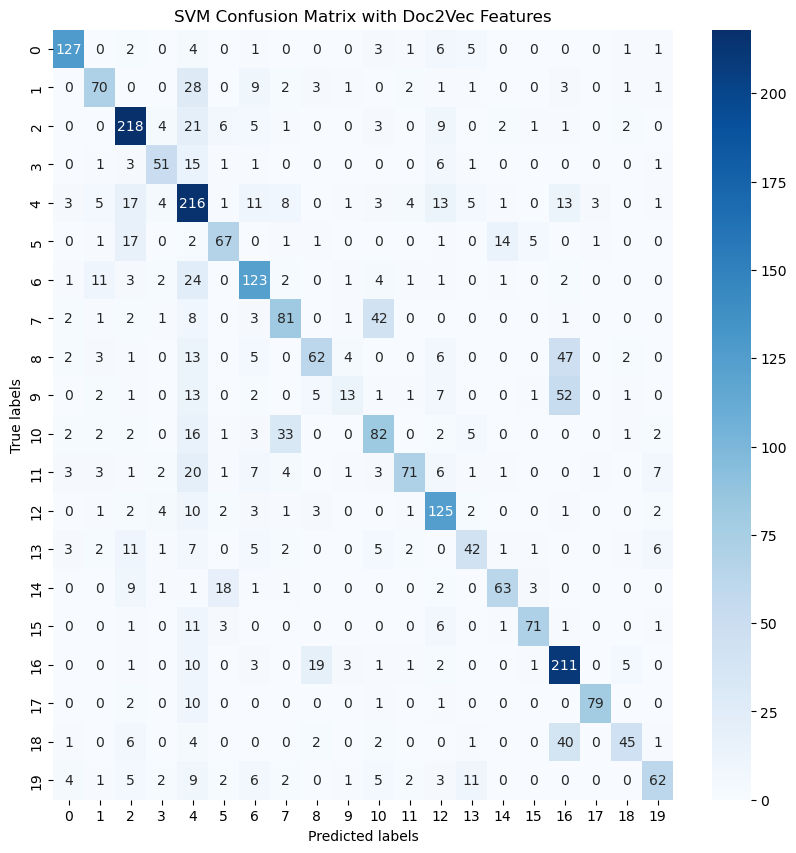

In [6]:
# Get the confusion matrix
svm_classifier.get_confusion_matrix(X_test, y_test, 'SVM Confusion Matrix with Doc2Vec Features')

In [7]:
# Use BERT features
X = embeddings.get_bert()
y = embeddings.get_labels()

# No need to scale the BERT features

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the SVM classifier
svm_classifier = SklearnClassifier(SVC, C=1.0)

In [10]:
# Train the classifier
start = time.time()
svm_classifier.train(X_train, y_train)
print('Training time: ', time.time() - start)

Training time:  21.834661960601807


In [11]:
# Evaluate the classifier
svm_classifier.evaluate(X_test, y_test)

{'Precision': 0.7876384189183191,
 'Recall': 0.7814981014842941,
 'F1': 0.7823084655172645,
 'Accuracy': 0.7814981014842941}

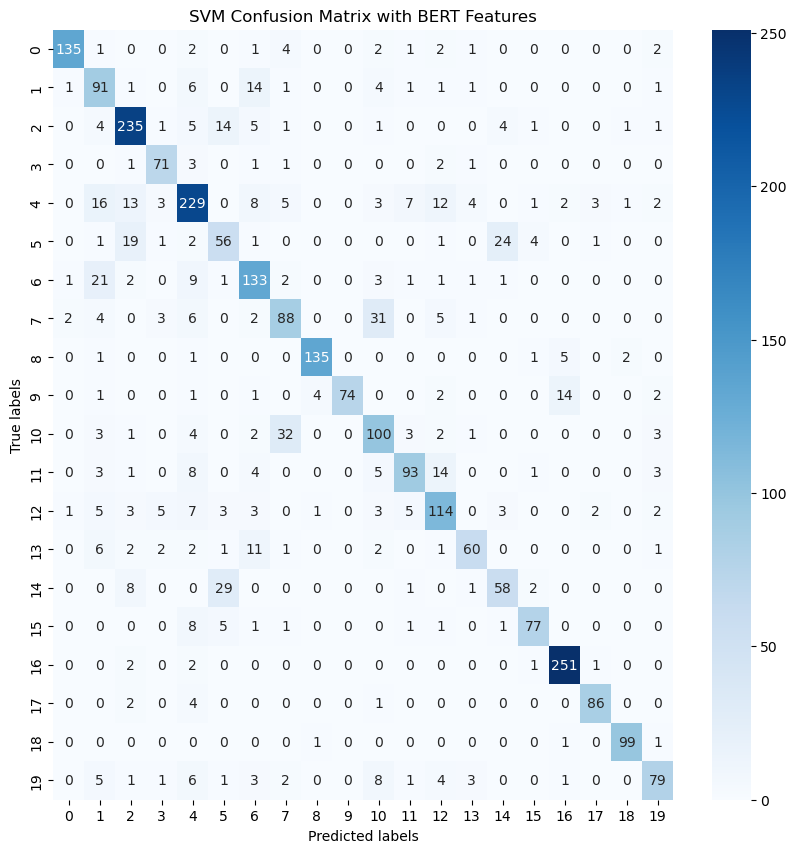

In [12]:
# Get the confusion matrix
svm_classifier.get_confusion_matrix(X_test, y_test, 'SVM Confusion Matrix with BERT Features')